In [43]:
import sys
sys.path.append("../src")
sys.path.append("../src/models")
import sklearn
import tslearn
import argparse
from train import prepare_dataset
from experiments import experiments
import tqdm
import numpy as np
from tslearn.svm import TimeSeriesSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from utils.classmetric import confusion_matrix_to_accuraccies
from sklearn.metrics import confusion_matrix

from tslearn.utils import to_time_series_dataset
from time import time
from sklearn.model_selection import RandomizedSearchCV
import scipy
from sklearn.ensemble import RandomForestClassifier

from utils.data2numpy import get_data

def flatten(x):
    return x.reshape(x.shape[0], -1)

In [9]:
tum_ds = get_data("isprs_rf_tum", N_per_class=500, N_largest=None, do_add_spectral_indices=True)
gaf_ds = get_data("isprs_rf_tum", N_per_class=500, N_largest=None, do_add_spectral_indices=True)


Initializing BavarianCropsDataset test partition in holl
read 23 classes
precached dataset files found at /data/BavarianCrops/npy/classmapping.isprs.csv/blocks/holl/test
loaded 9792 samples
Dataset /data/BavarianCrops. region holl. partition test. X:9792x(144, 13), y:(9792,) with 23 classes
Initializing BavarianCropsDataset test partition in nowa
read 23 classes
precached dataset files found at /data/BavarianCrops/npy/classmapping.isprs.csv/blocks/nowa/test
loaded 3572 samples
Dataset /data/BavarianCrops. region nowa. partition test. X:3572x(287, 13), y:(3572,) with 23 classes
Initializing BavarianCropsDataset test partition in krum
read 23 classes
precached dataset files found at /data/BavarianCrops/npy/classmapping.isprs.csv/blocks/krum/test
loaded 4306 samples
Dataset /data/BavarianCrops. region krum. partition test. X:4306x(143, 13), y:(4306,) with 23 classes
Initializing BavarianCropsDataset trainvalid partition in holl
read 23 classes
precached dataset files found at /data/Bavari

4it [00:00, 33.05it/s]

loaded 25368 samples
Dataset /data/BavarianCrops. region krum. partition trainvalid. X:25368x(71, 13), y:(25368,) with 23 classes
setting random seed to 0


232it [00:05, 41.11it/s]
70it [00:01, 41.41it/s]


Initializing BavarianCropsDataset test partition in holl
read 23 classes
precached dataset files found at /data/BavarianCrops/npy/classmapping.isprs.csv/blocks/holl/test
loaded 9792 samples
Dataset /data/BavarianCrops. region holl. partition test. X:9792x(144, 13), y:(9792,) with 23 classes
Initializing BavarianCropsDataset test partition in nowa
read 23 classes
precached dataset files found at /data/BavarianCrops/npy/classmapping.isprs.csv/blocks/nowa/test
loaded 3572 samples
Dataset /data/BavarianCrops. region nowa. partition test. X:3572x(287, 13), y:(3572,) with 23 classes
Initializing BavarianCropsDataset test partition in krum
read 23 classes
precached dataset files found at /data/BavarianCrops/npy/classmapping.isprs.csv/blocks/krum/test
loaded 4306 samples
Dataset /data/BavarianCrops. region krum. partition test. X:4306x(143, 13), y:(4306,) with 23 classes
Initializing BavarianCropsDataset trainvalid partition in holl
read 23 classes
precached dataset files found at /data/Bavari

5it [00:00, 41.82it/s]

loaded 25368 samples
Dataset /data/BavarianCrops. region krum. partition trainvalid. X:25368x(71, 13), y:(25368,) with 23 classes
setting random seed to 0


232it [00:05, 40.54it/s]
70it [00:01, 40.31it/s]


# Support Vector Machine

## TUM dataset

In [38]:
!cat /data/isprs/sklearn/svm_tum.txt
#svm_tum_params = {'C': 34.94762791972138, 'gamma': 0.09632187442535493, 'kernel': 'rbf'}
#svm_tum_params ={'C': 219.5746177088989, 'gamma': 0.030512293944411368, 'kernel': 'rbf'}
svm_tum_params ={'C': 219.5746177088989, 'gamma': 0.030512293944411368, 'kernel': 'rbf'}
!cat /data/isprs/sklearn/svm_gaf.txt
svm_gaf_params = {'C': 83.60975452306279, 'gamma': 0.03084148398718425, 'kernel': 'rbf'}

{'C': 27.448148872828842, 'gamma': 0.12838814399925444, 'kernel': 'rbf'} score: 0.01367283649913995
{'C': 79.587450816311, 'gamma': 0.12559307629658378, 'kernel': 'rbf'} score: 0.02258925586333583


In [39]:
X,y,ids, Xtest, ytest, idstest, classnames, class_idxs = tum_ds

clf = TimeSeriesSVC(n_jobs=8,**svm_tum_params)
clf.fit(X, y)
y_pred = clf.predict(Xtest)
print(classification_report(ytest, y_pred,labels=class_idxs, target_names=classnames))
metrics = confusion_matrix_to_accuraccies(confusion_matrix(ytest,y_pred))
overall_accuracy, kappa, precision, recall, f1, cl_acc = metrics
print(f"overall accuracy = {overall_accuracy:.2f}, kappa = {kappa:.2f}, precision = {precision.mean():.2f},",
      f"recall={recall.mean():.2f}, f1={f1.mean():.2f}")

                     precision    recall  f1-score   support

             fallow       0.00      0.00      0.00       356
      fallow+flower       0.00      0.00      0.00       225
            alfalfa       0.00      0.00      0.00       500
          grassland       0.00      0.00      0.00       469
      proteinplants       0.00      0.00      0.00        23
       winter wheat       0.00      0.00      0.00       500
               corn       0.00      0.00      0.00       500
       summer wheat       0.00      0.00      0.00        56
           beetroot       0.00      0.00      0.00        16
            potatoe       0.00      0.00      0.00       121
grassland+machining       0.00      0.00      0.00       500
   grassland+cattle       0.00      0.00      0.00       226
       winter spelt       0.00      0.00      0.00        52
         winter rye       0.00      0.00      0.00       104
      winter barley       0.00      0.00      0.00       500
      summer barley    

/home/marc/miniconda3/envs/tslearn/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [40]:
X,y,ids, Xtest, ytest, idstest, classnames, class_idxs = gaf_ds

clf = sklearn.svm.SVC(**svm_tum_params)
#clf = TimeSeriesSVC(n_jobs=8,**svm_tum_params)
clf.fit(feat_ext(X), y)
y_pred = clf.predict(feat_ext(Xtest))
print(classification_report(ytest, y_pred,labels=class_idxs, target_names=classnames))
metrics = confusion_matrix_to_accuraccies(confusion_matrix(ytest,y_pred))
overall_accuracy, kappa, precision, recall, f1, cl_acc = metrics
print(f"overall accuracy = {overall_accuracy:.2f}, kappa = {kappa:.2f}, precision = {precision.mean():.2f},",
      f"recall={recall.mean():.2f}, f1={f1.mean():.2f}")

                     precision    recall  f1-score   support

             fallow       0.14      0.16      0.15       356
      fallow+flower       0.18      0.43      0.26       225
            alfalfa       0.35      0.23      0.28       500
          grassland       0.16      0.05      0.08       469
      proteinplants       0.00      0.00      0.00        23
       winter wheat       0.00      0.00      0.00       500
               corn       0.42      0.21      0.28       500
       summer wheat       0.00      0.00      0.00        56
           beetroot       0.00      0.00      0.00        16
            potatoe       0.05      0.21      0.08       121
grassland+machining       0.11      0.05      0.07       500
   grassland+cattle       0.13      0.43      0.20       226
       winter spelt       0.00      0.00      0.00        52
         winter rye       0.00      0.00      0.00       104
      winter barley       0.20      0.05      0.08       500
      summer barley    

/home/marc/miniconda3/envs/tslearn/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [37]:
!pip install tsfresh
from tsfresh import extract_features
extracted_features = extract_features(X[0,:,0])

ValueError: You have to set the column_id which contains the ids of the different time series

In [25]:
def feat_ext(X):
    f1 = X.mean(1)
    f2 = X.std(1)
    f3 = np.median(X,1)
    return np.hstack([f1,f2,f2])

## GAF Dataset

In [31]:
X,y,ids, Xtest, ytest, idstest, classnames, class_idxs = gaf_ds

clf = TimeSeriesSVC(n_jobs=8,**svm_gaf_params)
clf.fit(X, y)
y_pred = clf.predict(Xtest)
print(classification_report(ytest, y_pred,labels=class_idxs, target_names=classnames))
metrics = confusion_matrix_to_accuraccies(confusion_matrix(ytest,y_pred))
overall_accuracy, kappa, precision, recall, f1, cl_acc = metrics
print(f"overall accuracy = {overall_accuracy:.2f}, kappa = {kappa:.2f}, precision = {precision.mean():.2f},",
      f"recall={recall.mean():.2f}, f1={f1.mean():.2f}")

                     precision    recall  f1-score   support

             fallow       0.00      0.00      0.00       356
      fallow+flower       0.00      0.00      0.00       225
            alfalfa       0.00      0.00      0.00       500
          grassland       0.00      0.00      0.00       469
      proteinplants       0.00      0.00      0.00        23
       winter wheat       0.00      0.00      0.00       500
               corn       0.00      0.00      0.00       500
       summer wheat       0.00      0.00      0.00        56
           beetroot       0.00      0.00      0.00        16
            potatoe       0.00      0.00      0.00       121
grassland+machining       0.00      0.00      0.00       500
   grassland+cattle       0.00      0.00      0.00       226
       winter spelt       0.00      0.00      0.00        52
         winter rye       0.00      0.00      0.00       104
      winter barley       0.00      0.00      0.00       500
      summer barley    

/home/marc/miniconda3/envs/tslearn/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Random Forest

In [4]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 70, 'bootstrap': False}


In [41]:
!cat /data/isprs/sklearn/random_forest_tum.txt
rf_tum_params = {'bootstrap': False, 'max_depth': 70, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 2000}
rf_tum_params = {'bootstrap': False, 'max_depth': 50, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 2000}
!cat /data/isprs/sklearn/random_forest_gaf.txt
rf_gaf_params = {'bootstrap': False, 'max_depth': 60, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 1000}
rf_gaf_params = {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1200}

{'bootstrap': False, 'max_depth': 70, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 2000} score: 0.4562794154074808
{'bootstrap': False, 'max_depth': 60, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 1000} score: 0.6899191833262441


## Raw Dataset

In [44]:
X,y,ids, Xtest, ytest, idstest, classnames, class_idxs = tum_ds

rf_tum = RandomForestClassifier(**rf_tum_params)
rf_tum.fit(flatten(X),y)
y_pred = rf_tum.predict(flatten(Xtest))
print(classification_report(ytest, y_pred,labels=class_idxs, target_names=classnames))
metrics = confusion_matrix_to_accuraccies(confusion_matrix(ytest,y_pred))
overall_accuracy, kappa, precision, recall, f1, cl_acc = metrics
print(f"overall accuracy = {overall_accuracy:.2f}, kappa = {kappa:.2f}, precision = {precision.mean():.2f},",
      f"recall={recall.mean():.2f}, f1={f1.mean():.2f}")

                     precision    recall  f1-score   support

             fallow       0.26      0.16      0.20       356
      fallow+flower       0.27      0.29      0.28       225
            alfalfa       0.50      0.15      0.23       500
          grassland       0.29      0.13      0.18       469
      proteinplants       0.00      0.00      0.00        23
       winter wheat       0.39      0.19      0.25       500
               corn       0.70      0.71      0.71       500
       summer wheat       0.00      0.00      0.00        56
           beetroot       1.00      0.19      0.32        16
            potatoe       0.09      0.24      0.13       121
grassland+machining       0.29      0.35      0.32       500
   grassland+cattle       0.14      0.27      0.19       226
       winter spelt       0.00      0.00      0.00        52
         winter rye       0.00      0.00      0.00       104
      winter barley       0.48      0.27      0.34       500
      summer barley    

/home/marc/miniconda3/envs/tslearn/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Preprocessed Dataset

In [45]:
X,y,ids, Xtest, ytest, idstest, classnames, class_idxs = gaf_ds

rf_tum = RandomForestClassifier(**rf_gaf_params)
rf_tum.fit(flatten(X),y)
y_pred = rf_tum.predict(flatten(Xtest))
print(classification_report(ytest, y_pred,labels=class_idxs, target_names=classnames))
metrics = confusion_matrix_to_accuraccies(confusion_matrix(ytest,y_pred))
overall_accuracy, kappa, precision, recall, f1, cl_acc = metrics
print(f"overall accuracy = {overall_accuracy:.2f}, kappa = {kappa:.2f}, precision = {precision.mean():.2f},",
      f"recall={recall.mean():.2f}, f1={f1.mean():.2f}")

                     precision    recall  f1-score   support

             fallow       0.23      0.14      0.18       356
      fallow+flower       0.28      0.29      0.28       225
            alfalfa       0.50      0.14      0.22       500
          grassland       0.27      0.13      0.17       469
      proteinplants       0.00      0.00      0.00        23
       winter wheat       0.36      0.17      0.23       500
               corn       0.71      0.72      0.71       500
       summer wheat       0.00      0.00      0.00        56
           beetroot       1.00      0.19      0.32        16
            potatoe       0.09      0.21      0.12       121
grassland+machining       0.30      0.34      0.32       500
   grassland+cattle       0.14      0.27      0.18       226
       winter spelt       1.00      0.02      0.04        52
         winter rye       0.00      0.00      0.00       104
      winter barley       0.48      0.26      0.33       500
      summer barley    

/home/marc/miniconda3/envs/tslearn/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## previous runs with other hyperparameter...

In [35]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       356
           1       1.00      1.00      1.00       371
           2       1.00      1.00      1.00      2215
           3       1.00      1.00      1.00       779
           4       1.00      1.00      1.00        32
           5       1.00      1.00      1.00      3002
           6       1.00      1.00      1.00      6217
           7       1.00      1.00      1.00        49
           8       1.00      1.00      1.00        36
           9       1.00      1.00      1.00        53
          10       1.00      1.00      1.00     17202
          11       1.00      1.00      1.00       494
          12       1.00      1.00      1.00       177
          13       1.00      1.00      1.00       146
          14       1.00      1.00      1.00      2762
          15       1.00      1.00      1.00      2219
          16       1.00      1.00      1.00       512
          17       1.00    

In [40]:
add_spectral_indices(X).shape

(5000, 70, 18)

In [23]:
y_pred

array([ 6, 10, 10, ..., 14,  2,  3])

In [24]:
ytest

array([ 6, 10, 10, ..., 14,  2,  3])

In [27]:
rf.predict(flatten(Xtest[0:2]))

array([ 6, 10])

In [28]:
ytest[0:2]

array([ 6, 10])

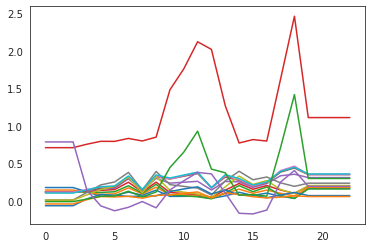

In [31]:
import matplotlib.pyplot as plt
plt.plot(Xtest[0])

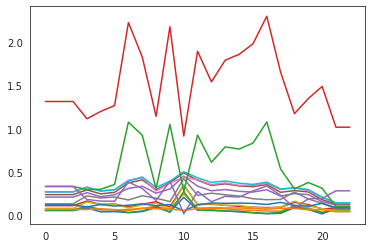

In [33]:
plt.plot(Xtest[1])